# El método de k vecinos más cercanos es un método de clasificación supervisada, que estima la probabilidad de que un elemento x pertenezca a una clase C a partir de la información proporcionada.

# En el reconocimiento de patrones, este algoritmo es usado como método de clasificación de objetos, basado en un entrenamiento medianto ejemplos cercanos en el espacio de los elementos.

# Es sencillo, fácil de entrenar y trabaja con cualquier número de clases.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
dataframe = pd.read_csv('vehiculos.csv')
dataframe.head()

,compactness,circularity,distance_circularity,radius_ratio,pr_axis_aspect_ratio,max_length_aspect_ratio,scatter_ratio,elongatedness,pr_axis_rectangularity,max_length_rectangularity,scaled_variance_major_axis,scaled_variance_minor_axis,scaled_radius_gyration,skewness_major_axis,skewness_minor_axis,kurtosis_minor_axis,kurtosis_major_axis,hollows_ratio,vehicle_class
0,95.0,48.0,83.0,178.0,72.0,10.0,162.0,42.0,20.0,159.0,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197.0,van
1,91.0,41.0,84.0,141.0,57.0,9.0,149.0,45.0,19.0,143.0,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199.0,van
2,104.0,50.0,106.0,209.0,66.0,10.0,207.0,32.0,23.0,158.0,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196.0,saab
3,93.0,41.0,82.0,159.0,63.0,9.0,144.0,46.0,19.0,143.0,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207.0,van
4,85.0,44.0,70.0,205.0,103.0,52.0,149.0,45.0,19.0,144.0,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183.0,bus


In [11]:
dataframe['vehicle_class'].unique()

array(['van', 'saab', 'bus', 'opel'], dtype=object)

In [12]:
y= dataframe['vehicle_class']
x= dataframe.drop('vehicle_class',axis=1)

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [15]:
x_train.head()

,compactness,circularity,distance_circularity,radius_ratio,pr_axis_aspect_ratio,max_length_aspect_ratio,scatter_ratio,elongatedness,pr_axis_rectangularity,max_length_rectangularity,scaled_variance_major_axis,scaled_variance_minor_axis,scaled_radius_gyration,skewness_major_axis,skewness_minor_axis,kurtosis_minor_axis,kurtosis_major_axis,hollows_ratio
300,106.0,53.0,98.0,193.0,60.0,10.0,215.0,31.0,24.0,169.0,224.0,681.0,218.0,73.0,8.0,21.0,188.0,197.0
73,73.0,37.0,53.0,111.0,54.0,6.0,126.0,55.0,18.0,128.0,135.0,227.0,147.0,82.0,1.0,15.0,176.0,184.0
586,98.0,55.0,108.0,168.0,53.0,11.0,224.0,30.0,25.0,178.0,231.0,737.0,217.0,73.0,8.0,30.0,187.0,198.0
753,91.0,36.0,72.0,162.0,60.0,8.0,150.0,44.0,19.0,133.0,166.0,334.0,121.0,63.0,2.0,22.0,196.0,205.0
405,88.0,40.0,73.0,173.0,68.0,7.0,150.0,44.0,19.0,137.0,174.0,341.0,151.0,69.0,2.0,20.0,196.0,200.0


In [18]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [19]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [20]:
y_pred = knn.predict(x_test)

In [22]:
y_pred

array(['bus', 'van', 'bus', 'van', 'bus', 'van', 'bus', 'saab', 'bus',
       'opel', 'saab', 'bus', 'bus', 'saab', 'saab', 'saab', 'bus', 'bus',
       'opel', 'saab', 'van', 'van', 'opel', 'opel', 'opel', 'opel',
       'van', 'van', 'van', 'van', 'saab', 'van', 'bus', 'van', 'van',
       'bus', 'saab', 'saab', 'bus', 'opel', 'van', 'bus', 'opel', 'van',
       'saab', 'opel', 'bus', 'van', 'bus', 'saab', 'bus', 'bus', 'opel',
       'van', 'bus', 'saab', 'saab', 'opel', 'opel', 'bus', 'bus', 'opel',
       'opel', 'saab', 'bus', 'bus', 'saab', 'opel', 'saab', 'saab',
       'opel', 'bus', 'saab', 'bus', 'van', 'opel', 'saab', 'opel',
       'opel', 'van', 'bus', 'van', 'opel', 'saab', 'opel', 'saab',
       'opel', 'bus', 'van', 'saab', 'saab', 'opel', 'opel', 'saab',
       'saab', 'saab', 'van', 'van', 'bus', 'opel', 'saab', 'saab',
       'saab', 'van', 'bus', 'bus', 'opel', 'van', 'opel', 'saab', 'van',
       'bus', 'van', 'bus', 'bus', 'van', 'bus', 'opel', 'bus', 'opel',
   

In [24]:
from sklearn.metrics import classification_report, confusion_matrix

In [26]:
print(confusion_matrix(y_test,y_pred))

[[61  4 12  1]
 [ 0 17 26  4]
 [ 4 32 34  1]
 [ 2  2  3 51]]


In [27]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         bus       0.91      0.78      0.84        78
        opel       0.31      0.36      0.33        47
        saab       0.45      0.48      0.47        71
         van       0.89      0.88      0.89        58

    accuracy                           0.64       254
   macro avg       0.64      0.63      0.63       254
weighted avg       0.67      0.64      0.65       254



In [28]:
tasa_error = []

In [29]:
for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    prediccion_i = knn.predict(x_test)
    tasa_error.append(np.mean(prediccion_i != y_test))

In [30]:
tasa_error

[0.35826771653543305,
 0.3661417322834646,
 0.3346456692913386,
 0.3661417322834646,
 0.3661417322834646,
 0.3700787401574803,
 0.3661417322834646,
 0.37401574803149606,
 0.3779527559055118,
 0.4015748031496063,
 0.41338582677165353,
 0.421259842519685,
 0.4015748031496063,
 0.41732283464566927,
 0.39763779527559057,
 0.4094488188976378,
 0.4015748031496063,
 0.41338582677165353,
 0.3937007874015748,
 0.41338582677165353,
 0.41338582677165353,
 0.4094488188976378,
 0.41732283464566927,
 0.41338582677165353,
 0.41732283464566927,
 0.4251968503937008,
 0.42913385826771655,
 0.4330708661417323,
 0.4409448818897638]

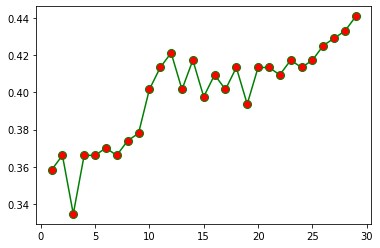

In [31]:
valores = range(1,30)
plt.plot(valores,tasa_error,color='green',marker='o',markerfacecolor='red',markersize=8)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
prediccion = knn.predict(x_test)